  # <center>  House Prices </center>
  

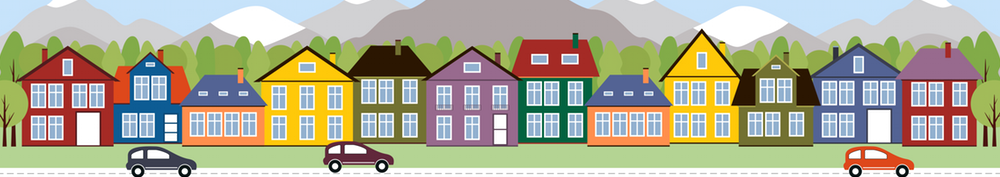

## Introduction


These datasets include information about residential homes that were sold from 2006 to 2010 in Ames, Iowa. The purpose will be to predict the final price of each home.

### These datasets contain 79 explanatory variables:

*   Train data have SalePrice (dependent variable) and other predictors variables.
*   Test data contains the same variables that in train data, but  without SalePrice (dependent variable) because this data will be submitted to kaggle.

 

## Importing packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
import lightgbm as lgb

In [2]:
# display all the dateframe
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Loading the Datasets

In [3]:
train_data = pd.read_csv('./datasets/train.csv', index_col='Id')
test_data = pd.read_csv('./datasets/test.csv', index_col='Id')
submission = pd.read_csv('./datasets/sample_submission.csv', index_col='Id')

In [4]:
# combine train and test data 
df_all = pd.concat([train_data.drop('SalePrice', axis=1), test_data], sort=True)  #df without the target

# Exploring the Data

In [5]:
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [6]:
df_all.shape

(2919, 79)

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   Alley          198 non-null    object 
 4   BedroomAbvGr   2919 non-null   int64  
 5   BldgType       2919 non-null   object 
 6   BsmtCond       2837 non-null   object 
 7   BsmtExposure   2837 non-null   object 
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtFinType1   2840 non-null   object 
 11  BsmtFinType2   2839 non-null   object 
 12  BsmtFullBath   2917 non-null   float64
 13  BsmtHalfBath   2917 non-null   float64
 14  BsmtQual       2838 non-null   object 
 15  BsmtUnfSF      2918 non-null   float64
 16  CentralAir     2919 non-null   object 
 17  Condition1     2919 non-null   object 
 18  Conditio

## Data Types

In [8]:
numeric_data = df_all.select_dtypes(include=['int64','float64']) # by default pandas read data in 64 bit
categorical_data = df_all.select_dtypes(include=['object'])

In [9]:
print('Numeric Features:',len(list(numeric_data.columns)))
print('Categorical Features:',len(list(categorical_data.columns)))

Numeric Features: 36
Categorical Features: 43


## Missing Values

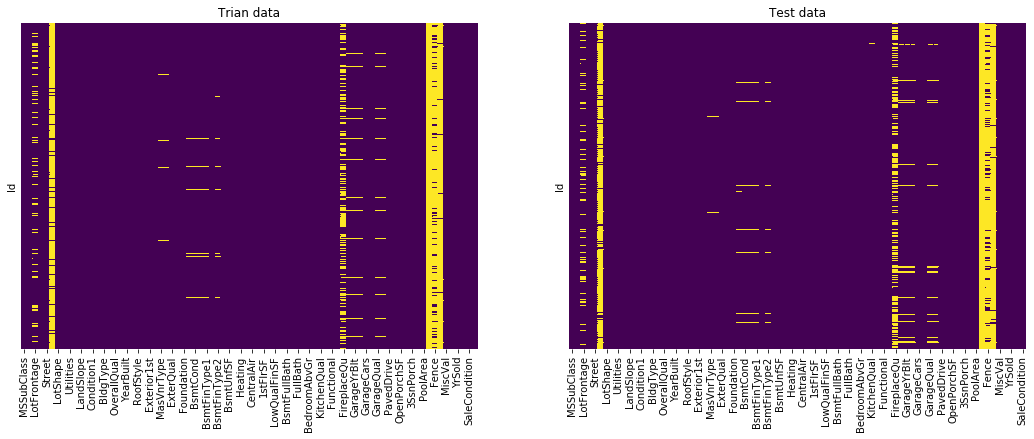

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Trian data')

sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

**Out of 81 features, 34 features have missing values.**

In [11]:
missing = df_all.isnull().sum().sort_values(ascending=False)
percentage = (df_all.isnull().sum() / df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percentage], axis=1, keys=['Missing', '%']) 
missing_data = pd.concat([missing_data, df_all.dtypes], axis=1, join='inner').rename(columns={0:'type'})
missing_data = missing_data[missing_data != 0].dropna()
missing_data

,Missing,%,type
PoolQC,2909.0,0.996574,object
MiscFeature,2814.0,0.964029,object
Alley,2721.0,0.932169,object
Fence,2348.0,0.804385,object
FireplaceQu,1420.0,0.486468,object
LotFrontage,486.0,0.166495,float64
GarageFinish,159.0,0.054471,object
GarageQual,159.0,0.054471,object
GarageYrBlt,159.0,0.054471,float64
GarageCond,159.0,0.054471,object


Numeric features with null values

In [12]:
missing_data[missing_data['type'] != 'object']

,Missing,%,type
LotFrontage,486.0,0.166495,float64
GarageYrBlt,159.0,0.054471,float64
MasVnrArea,23.0,0.007879,float64
BsmtHalfBath,2.0,0.000685,float64
BsmtFullBath,2.0,0.000685,float64
GarageCars,1.0,0.000343,float64
GarageArea,1.0,0.000343,float64
TotalBsmtSF,1.0,0.000343,float64
BsmtUnfSF,1.0,0.000343,float64
BsmtFinSF2,1.0,0.000343,float64


Object features with null values

In [13]:
missing_data[missing_data['type'] == 'object']

,Missing,%,type
PoolQC,2909.0,0.996574,object
MiscFeature,2814.0,0.964029,object
Alley,2721.0,0.932169,object
Fence,2348.0,0.804385,object
FireplaceQu,1420.0,0.486468,object
GarageFinish,159.0,0.054471,object
GarageQual,159.0,0.054471,object
GarageCond,159.0,0.054471,object
GarageType,157.0,0.053786,object
BsmtCond,82.0,0.028092,object


## Distribution of SalePrice

Let's take a look at the most important variable <b>SalePrice</b>

It seems there is a long tail to the right which means high sale prices, which will make the mean to be much higher than the median.

1.8828757597682129
0.12133506220520406


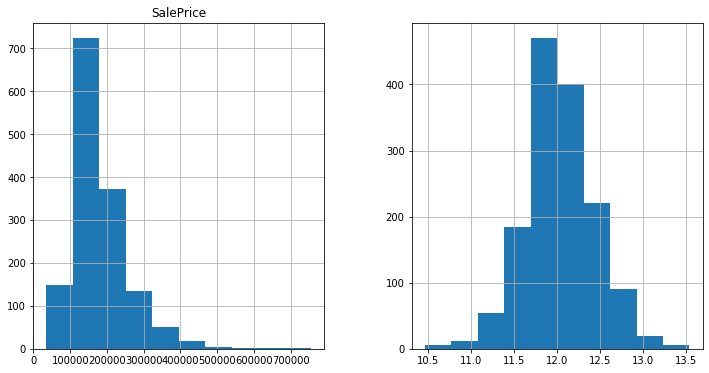

In [14]:
# adding the target to our df
df_all = pd.concat([df_all, train_data['SalePrice']], axis=1)
normal_sp = df_all['SalePrice'].dropna().map(lambda i: np.log(i) if i > 0 else 0)
print(df_all['SalePrice'].skew())
print(normal_sp.skew())

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
df_all.hist('SalePrice', ax=ax[0])
normal_sp.hist(ax=ax[1])
plt.show();

In [15]:
df_all['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Correlation Matrix with SalePrice

Now let's take a look at the most important features, which would have a strong linear releationship with <b>SalePrice</b>
<br><br>
Note: these correlations only for the numeric features, We will do another correlation matrix after features engineering

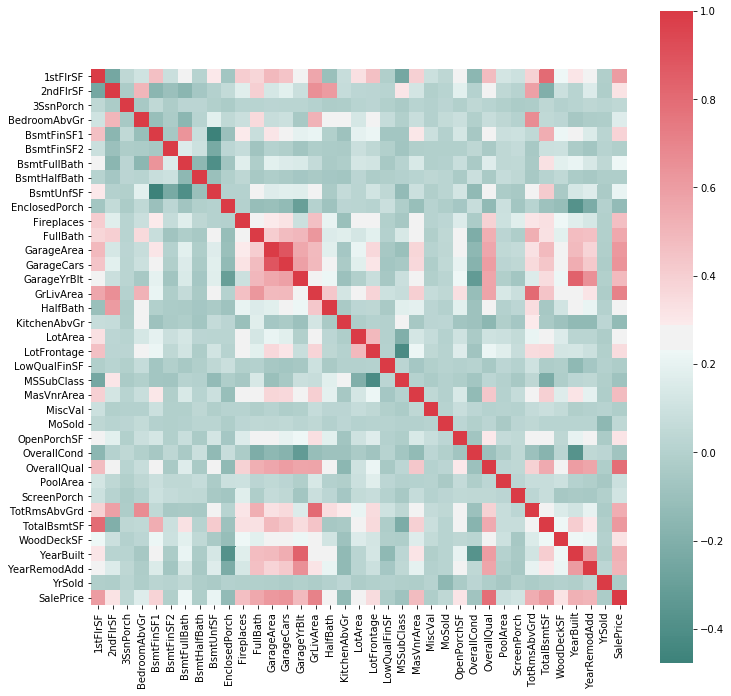

In [16]:
corr = df_all.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True, cmap=sns.diverging_palette(180, 10, as_cmap = True));

In [17]:
# correlation with the target
corr_matrix = df_all.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Here is another correlation matrix, but this one for features 50% or higher with SalePrice
<br><br>
As we see in the correlation matrix, the features that related to quality and the size affect the sale price, which might affect our results. In addition, OverallQual feature has a significant impact on sale price more than other features.
<br><br>
Note: these correlations only for the numeric features, We will do another correlation matrix after features engineering

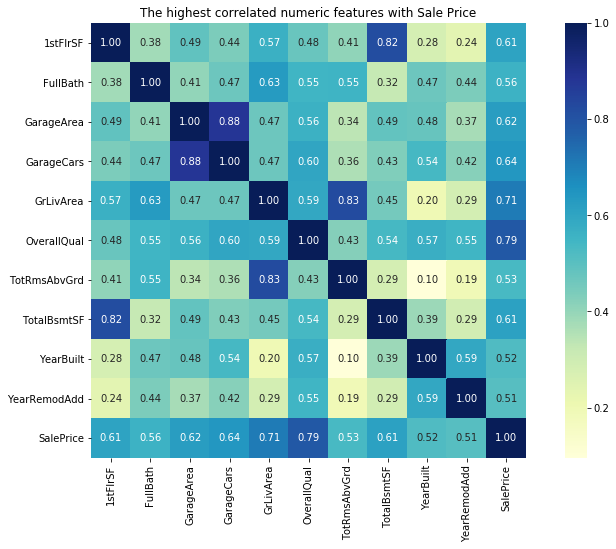

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
corrmat = abs(df_all.corr())
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols = corrmat[corrmat['SalePrice'] >= 0.5].index    # use this line or the line above
cm = abs(np.corrcoef(df_all[cols].dropna().values.T))

sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values, ax=ax, cmap="YlGnBu")
plt.title('The highest correlated numeric features with Sale Price')
plt.show();

## Outliars

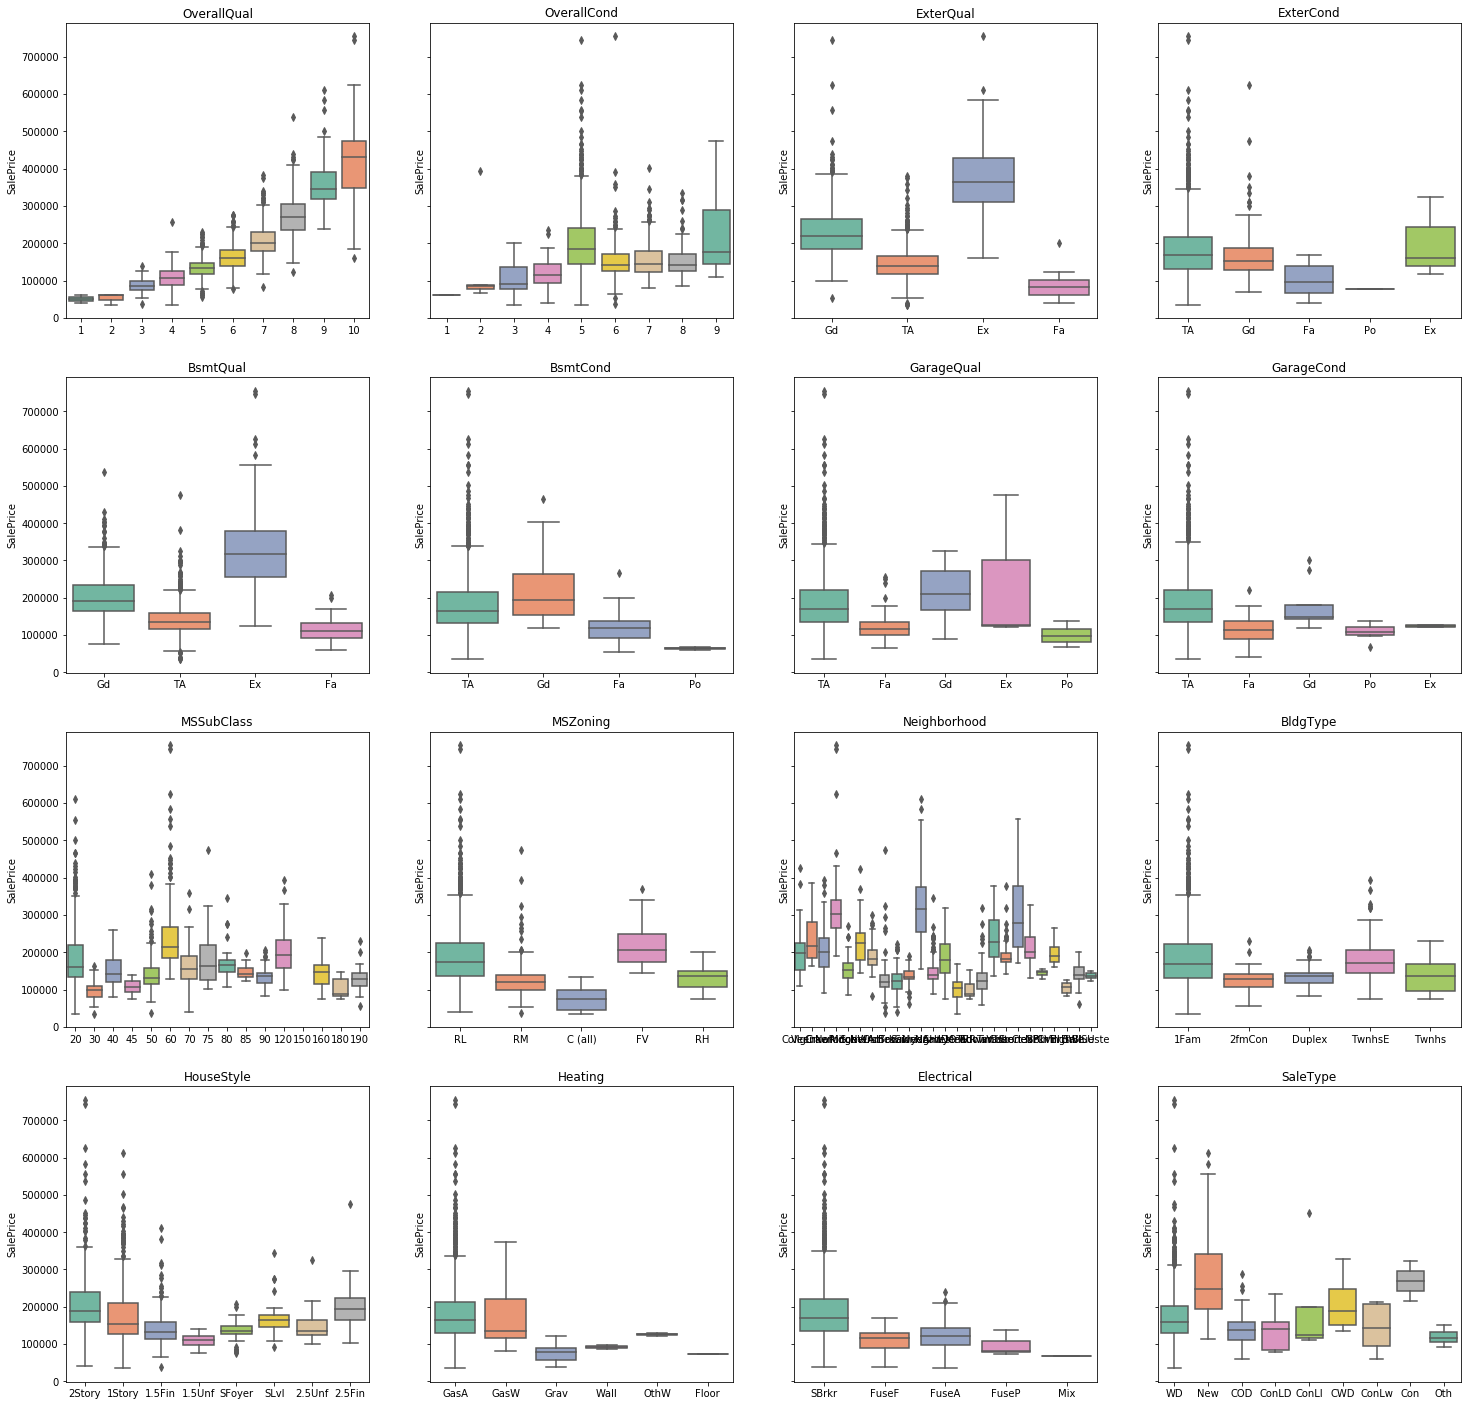

In [19]:
fig, axes = plt.subplots(ncols=4, nrows=4, 
                         figsize=(5 * 5, 5 * 5), sharey=True)
axes = np.ravel(axes)
cols = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
        'BsmtCond','GarageQual','GarageCond', 'MSSubClass','MSZoning',
        'Neighborhood','BldgType','HouseStyle','Heating','Electrical','SaleType']

for i, c in zip(np.arange(len(axes)), cols):
    ax = sns.boxplot(x=c, y='SalePrice', data=df_all, ax=axes[i], palette="Set2")
    ax.set_title(c)
    ax.set_xlabel("")

## Exploring object features

In [20]:
object_features = df_all.loc[:, df_all.dtypes == np.object] 
for col in object_features.columns:
    print(df_all[col].value_counts(), '\n\n\n\n')

Grvl    120
Pave     78
Name: Alley, dtype: int64 




1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64 




TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64 




No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64 




Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64 




Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64 




TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64 




Y    2723
N     196
Name: CentralAir, dtype: int64 




Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64 




Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64 




S

# Features Engineering

##   Fill missing values

For missing values in 'GarageYrBlt' we can take the year from 'YearBuilt'

In [21]:
df_all['GarageYrBlt'].fillna(df_all['YearBuilt'], inplace = True)

The 2 cells below are some ideas but after modeling got slightly worse results, So they are commented 

In [22]:
# for feat in ['YearBuilt','YearRemodAdd', 'GarageYrBlt']:
#     df_all[feat] = df_all['YrSold'] - df_all[feat]

In [23]:
# new features to indicate the null values
# for feat in missing_data[missing_data['type'] != 'object'].index:   # index here contains columns names
#     df_all[feat+'_NaN'] = np.where(df_all[feat].isnull(), 1, 0)

### Impute numeric missing values

**KNNImputer** (good results but not the best)<br>
If you have Sklearn 0.22.2 or above you can use this imputer

In [24]:
# imputer = KNNImputer(n_neighbors=60)
# df_all.loc[:, df_all.dtypes != np.object] = imputer.fit_transform(numeric_data)

**SimpleImputer** (good results but also not the best)

In [25]:
# imp = SimpleImputer(missing_values=np.nan, strategy='median')
# df_all.loc[:, df_all.dtypes != np.object] = imp.fit_transform(numeric_data)

**Linear interpolate** (THE BEST RESULTS)

In [26]:
df_all[numeric_data.columns] = df_all[numeric_data.columns].interpolate(method='linear')

Number of numeric null values after imputing

In [27]:
df_all[numeric_data.columns].isnull().sum().sum()

0

###   Filling object Missing values

Categorical features with meaningful null values, For specific meaning look in the date description in kaggle

In [28]:
edit_values = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
              'GarageQual','PoolQC','Fence','MiscFeature','MasVnrType', 'GarageCond', 'GarageFinish']

df_all[edit_values] = df_all[edit_values].fillna('NA')

In [29]:
catg_nulls = df_all[categorical_data.columns].isnull().sum()[df_all.isnull().sum() > 0]
print(f'Total Missing values: {catg_nulls.sum()} \n\n{catg_nulls}')

Total Missing values: 13 

Electrical     1
Exterior1st    1
Exterior2nd    1
Functional     2
KitchenQual    1
MSZoning       4
SaleType       1
Utilities      2
dtype: int64


**Filling the rest of null categorical features with mode** (leaving the cell below commented will lead "get_dummies" later to ignore these null values, and when we tested that we got a better results)

In [30]:
# _ = [df_all[col].fillna(df_all[col].mode()[0], inplace=True) for col in catg_nulls.index]

## Getting dummies for all categorical columns

In [31]:
df_all= pd.get_dummies(df_all, drop_first=True)

## Correlation matrix with SalePrice after getting dummies

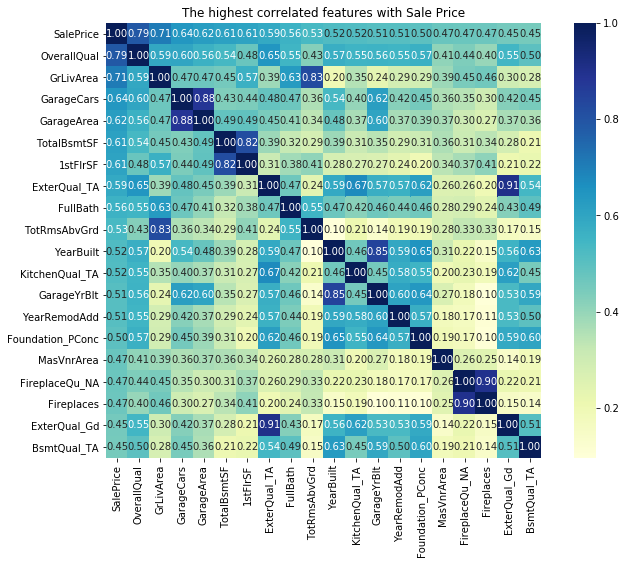

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
corrmat = abs(df_all.corr())
cols = corrmat.nlargest(20, 'SalePrice')['SalePrice'].index
# cols = corrmat[corrmat['SalePrice'] > 0.5].index    # use this line or the line above
cm = abs(np.corrcoef(df_all[cols].dropna().values.T))

sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values, ax=ax, cmap="YlGnBu")
ax.set_title('The highest correlated features with Sale Price')
plt.show();

In [33]:
# correlation with the target
top_corr = abs(df_all.corr())
top_features = top_corr.sort_values(by="SalePrice", ascending=False).head(20)

In [34]:
top_features['SalePrice'].sort_values( ascending=False)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
ExterQual_TA        0.589044
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
KitchenQual_TA      0.519298
GarageYrBlt         0.508043
YearRemodAdd        0.507101
Foundation_PConc    0.497734
MasVnrArea          0.474279
FireplaceQu_NA      0.471908
Fireplaces          0.466929
ExterQual_Gd        0.452466
BsmtQual_TA         0.452394
Name: SalePrice, dtype: float64

## Normal distribution

Saving copy of 'df_all' before correcting skewness, because after testing xgboost the results better without skew correction.

In [35]:
df_all_xgb = df_all.copy()

the data contains a lot of outliars which make the data distribution skewed, So we will take the log of all the numeric features to be less skewed 

In [36]:
# skewed_feat = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
skewed_feat = numeric_data.columns.to_list()
skewed_feat.append('SalePrice')
for feat in skewed_feat:
    df_all[feat] = np.log1p(df_all[feat])

## Separating Train and Test data

In [37]:
# Train Data
newtraining = df_all.loc[:1460]
# Test Data
newtesting = df_all.loc[1461:].drop('SalePrice', axis=1)

In [38]:
newtraining.shape, newtesting.shape

((1460, 261), (1459, 260))

In [39]:
newtraining_xgb = df_all_xgb.loc[:1460]
newtesting_xgb = df_all_xgb.loc[1461:].drop('SalePrice', axis=1)

# Features Selection

## Drop features correlated with each other
**(Doesn't improve the results but less features)**<br>
(this manual method for experiment)

***Finding correlated columns 0.90 or higher, Then drop the one which have less correlation with SalePrice***

In [40]:
# features_corr = abs(newtraining.corr()).sort_values(by='SalePrice', ascending=False).drop('SalePrice', axis=1).drop('SalePrice')

# # np.where will return 2 arrays the first one(the good one) contains row indexes,
# # and the second one contains columns indexes(to drop some)
# keep_feat, del_feat = np.where((features_corr > .90) & (features_corr < 1))

In [41]:
# # to get keep_feat and del_feat names 
# keep_feat = features_corr.iloc[keep_feat, :].index # use rows and .index to get columns names
# keep_feat = keep_feat.drop_duplicates()
# del_feat = features_corr.iloc[:, del_feat].columns # use columns and .columns to get columns names
# del_feat = del_feat.drop_duplicates()

In [42]:
# keep_and_del = list(zip(keep_feat, del_feat)) # Correlated columns
# keep_and_del

In [43]:
# feat_to_drop = []
# for col in keep_and_del:
#     if col[0] in del_feat:
#         if np.where(del_feat == col[0]) < np.where(keep_feat == col[0]):
#             feat_to_drop.append(col[0])
            
# feat_to_drop

In [44]:
# newtraining.drop(feat_to_drop, axis=1, inplace=True)
# newtesting.drop(feat_to_drop, axis=1, inplace=True)
# no_outliars_df.drop(feat_to_drop, axis=1, inplace=True)

## Features Selection using (Lasso)
**(Much better results with linear models,  but slightly worse in tree based models)**

In [45]:
y = newtraining['SalePrice']
X = newtraining.drop('SalePrice', axis=1)

Note: we will not be doing features selection for 'X_xgb' because the results also better without features selection for xgboost 

In [46]:
y_xgb = newtraining_xgb['SalePrice']
X_xgb = newtraining_xgb.drop('SalePrice', axis=1)

In [47]:
print('Number of features before features selection: ', X.shape[1])

Number of features before features selection:  260


In [48]:
feat_sel = SelectFromModel(Lasso(alpha=0.001, random_state=42))
feat_sel.fit(X, y);

In [49]:
X = feat_sel.transform(X)
newtesting = feat_sel.transform(newtesting)

In [50]:
print('Number of features after features selection: ', X.shape[1])

Number of features after features selection:  73


# Modeling

**for all models except XGBoost**

In [51]:
ss = StandardScaler()
Xs =ss.fit_transform(X)
testing = ss.transform(newtesting)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    Xs, y, test_size=0.10, random_state=42)

**for Xgboost**

In [53]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb, y_xgb, test_size=1, random_state=42)

## Apply modeling

In [54]:
def modeling(model, X_train, y_train, test_data, X_test=None, y_test=None, prefit=False):
    '''Takes model and data then print model results with some linear metrics then return predictions'''
    
    start = "\033[1m" # to create BOLD print
    end = "\033[0;0m" # to create BOLD print
    
    # Print bold model name 
    model_name = str(model).split('(')[0]
    print(''.join(['\n', start, model_name, end]))
    
    #Fit model
    if not prefit:
        model.fit(X_train, y_train)
    
    #Accuarcy score    
    print('Train Score', model.score(X_train, y_train))
    try:
        print('Test Score :', model.score(X_test, y_test))
    except: pass
    
    #cross val score
    cv=KFold(n_splits=5, shuffle=True, random_state=42)
    mse = -(cross_val_score(model, X_train, y_train, cv=cv, scoring = 'neg_mean_squared_error'))
    print('CV RMSE: ', np.sqrt(mse))
    print('CV RMSE mean: ', np.sqrt(mse).mean())
    
    #predictions
    y_pred = np.expm1(model.predict(test_data))
    print('\nFirst 5 Predictions: \n', y_pred[:5])  

    return y_pred

In [56]:
# Models
lr = LinearRegression()
lasso = Lasso(alpha=0.001)
ridge = Ridge(7)
elastic = ElasticNet(0.002335721469090121)
tree = DecisionTreeRegressor(max_depth=10, random_state=42,)
randomF = RandomForestRegressor(max_depth=18, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=7)
lasso_cv = LassoCV(alphas= np.logspace(-5, 0, num=20), cv=5)
ridge_cv = RidgeCV(alphas= np.logspace(-5, 20, num=100), cv=5)
elastic_cv = ElasticNetCV(alphas= np.logspace(-5, 0, num=20), cv=5)



models = [(lr,'lr'), (lasso,'lasso'), (ridge,'ridge'), (elastic,'elastic'), (tree,'tree'), (randomF,'randomF'),
         (knn_reg,'knn_reg'), (lasso_cv,'lasso_cv'), (ridge_cv,'ridge_cv'), (elastic_cv,'elastic_cv')]

preds = {}    # empty dict to save all models predictions
for model, name in models:
    preds[name] = modeling(model, X_train, y_train, testing, X_test, y_test)


LinearRegression
Train Score 0.9107993508395565
Test Score : 0.9493031678186671
CV RMSE:  [0.12005389 0.12916222 0.1198121  0.14201052 0.14185283]
CV RMSE mean:  0.1305783125366981

First 5 Predictions: 
 [113783.15594151 158279.17551882 182182.49754609 196246.2007667
 203136.67893215]

Lasso
Train Score 0.9101119452806381
Test Score : 0.9456019104900957
CV RMSE:  [0.11987104 0.12817546 0.12012761 0.14137195 0.14095176]
CV RMSE mean:  0.1300995626803892

First 5 Predictions: 
 [114297.7312206  158690.81207302 181527.7549836  196157.43324712
 205050.19969041]

Ridge
Train Score 0.9107005088964288
Test Score : 0.9489190133240372
CV RMSE:  [0.11997035 0.12832359 0.12014308 0.1420034  0.14172822]
CV RMSE mean:  0.1304337286153145

First 5 Predictions: 
 [113900.82122155 158280.29217109 182637.46876572 197209.17887821
 203550.27268328]

ElasticNet
Train Score 0.9098227555733147
Test Score : 0.9448346848397238
CV RMSE:  [0.11993112 0.12802381 0.12014117 0.141433   0.14083722]
CV RMSE mean: 

### Finding the Best Alpha for (Lasso, ElasticNet, Ridge)

In [57]:
def g_search(model, param, X_train, y_train, test_data, X_test=None, y_test=None):
    '''Simple grid search with kfold'''
    cv=KFold(n_splits=5, shuffle=True, random_state=42)
    gs = GridSearchCV(model,
                  param,
                  scoring='neg_mean_squared_error',
                  cv=cv,
                  n_jobs=-1,
                  verbose=0)
    gs.fit(X_train, y_train)
    
    # Results
    y_pred = modeling(gs.best_estimator_, X_train, y_train, test_data, X_test, y_test, prefit=True) # print results and return predictions
    
    print('Best parameters: ', gs.best_params_)
    
    return y_pred

In [58]:
# grid search using all the data (Xs, y)
grid_lasso_pred = g_search(Lasso(), {'alpha': np.logspace(-5, 0, num=20)}, Xs, y, testing)
grid_ridge_pred = g_search(Ridge(), {'alpha': np.arange(0, 400, 1)}, Xs, y, testing)
grid_elastic_pred = g_search(ElasticNet(), {'alpha': np.logspace(-5, 0, num=20)}, Xs, y, testing)


Lasso
Train Score 0.9156678939109967
CV RMSE:  [0.12475937 0.11989921 0.16084021 0.12254952 0.11514712]
CV RMSE mean:  0.12863908405734276

First 5 Predictions: 
 [113344.1820562  157698.28286255 181822.01216501 197461.77067943
 204726.55526184]
Best parameters:  {'alpha': 0.0006951927961775605}

Ridge
Train Score 0.9141809334648
CV RMSE:  [0.12580576 0.12158643 0.15789473 0.12326052 0.11441261]
CV RMSE mean:  0.12859201005628962

First 5 Predictions: 
 [113406.63865963 157808.71215191 184168.66874619 201879.71397864
 204397.90541397]
Best parameters:  {'alpha': 86}

ElasticNet
Train Score 0.9156923357260774
CV RMSE:  [0.12466192 0.11989288 0.16082324 0.12254929 0.11526473]
CV RMSE mean:  0.12863841296729653

First 5 Predictions: 
 [113323.25587765 157685.87980201 181915.09804917 197590.2732461
 204653.23747356]
Best parameters:  {'alpha': 0.0012742749857031334}


### Build XGBOOST  Regressor

In [59]:
xgb_model = xgb.XGBRegressor(
                                 colsample_bytree=0.2,
                                 gamma=0.0,
                                 learning_rate=0.01,
                                 max_depth=4,
                                 min_child_weight=1.5,
                                 n_estimators=3800,                                                                  
                                 reg_alpha=0.9,
                                 reg_lambda=0.6,
                                 subsample=0.2,
                                 seed=42,
                                 tree_method='approx'
                                 )

xgb_hist = xgb_model.fit(X_train_xgb,y_train_xgb)
#                          eval_set=[(X_train_xgb,y_train_xgb),(X_test_xgb,y_test_xgb)],
#                          eval_metric='rmse',
#                          early_stopping_rounds=3000
#                         )
# before combining train and predicted fit with : n_estimators=3800
# after combining train and predicted fit with : n_estimators=4500

In [60]:
xgb_predictions = xgb_model.predict(newtesting_xgb)
xgb_predictions[:5]

array([124244.41, 159455.72, 191689.7 , 195500.38, 191116.1 ],
      dtype=float32)

In [61]:
cv=KFold(n_splits=5, shuffle=True, random_state=42)
mse = -(cross_val_score(xgb_model, X_xgb, y_xgb, cv=cv, scoring='neg_mean_squared_error'))

In [62]:
np.sqrt(mse).mean()

28025.00504233528

**Adding predictions to the train data then fit again**

In [63]:
train_and_pred = pd.concat([X_xgb, newtesting_xgb])

In [64]:
new_y = y_xgb.append(pd.Series(xgb_predictions)).reset_index(drop=True)
new_y.index += 1
new_y.index.name = 'Id'

In [65]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    train_and_pred, new_y, test_size=1, random_state=42)

In [66]:
xgb_model.n_estimators = 4500  # change n_estimator from 3800 to 4500
xgb_model.fit(X_train_xgb,y_train_xgb)

xgb_predictions = xgb_model.predict(newtesting_xgb)
xgb_predictions[:5]

array([125286.766, 158950.06 , 189310.05 , 196449.72 , 184245.31 ],
      dtype=float32)

### Build LGBMRegressor

In [67]:
lgb_reg=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035,
                                n_estimators=3500, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_reg.fit(X_train, y_train)
print('Train: ',lgb_reg.score(X_train,y_train))
print('Test: ',lgb_reg.score(X_test,y_test))

Train:  0.9765993441792744
Test:  0.9324291701149572


In [68]:
cv=KFold(n_splits=5, shuffle=True, random_state=42)
mse = -(cross_val_score(lgb_reg, Xs, y, cv=cv, scoring='neg_mean_squared_error'))
np.sqrt(mse).mean()

0.12873696410754332

In [69]:
lgb_reg_predictions = np.expm1(lgb_reg.predict(testing))
lgb_reg_predictions[:5]

array([120858.20365802, 163477.43937361, 188595.02977546, 194172.32366112,
       190202.09972907])

###  Results

In [70]:
new_pred = (xgb_predictions + grid_elastic_pred) / 2
new_pred[:5]

array([119305.01075132, 158317.97115101, 185612.57246209, 197019.99599805,
       194449.27498678])

### Submission

In [71]:
the_submission = submission.copy()
the_submission['SalePrice'] = new_pred
the_submission['SalePrice'].head()

Id
1461    119305.010751
1462    158317.971151
1463    185612.572462
1464    197019.995998
1465    194449.274987
Name: SalePrice, dtype: float64

In [73]:
the_submission.to_csv('the_submission.csv')

# Best Result (elastic_predictions + xgb_predictions) / 2

In [74]:
# Final Result: !!!!!!! KAGGLE SCORE: 0.11696 !!!!!!!

# This is the best result I got
# This result from (elastic_predictions + xgb_predictions) / 2

# And each model trained with different features and elastic with log1p and features selection but not xgboost
# ========================================== And finally ====================================

# new_pred = (elastic_predictions + xgb_predictions) / 2


# In the next two cells each model parameters 

## Best model parameters (XGBRegressor) 

In [75]:
# !!!! This resualt with adding the predicted values to the train again and fit with xgboost again
#                                        (the first fit: n_estimators=3800, the second fit: n_estimators=4500)
# xgb_model = xgb.XGBRegressor(
#                                  colsample_bytree=0.2,
#                                  gamma=0.0,
#                                  learning_rate=0.01,
#                                  max_depth=4,
#                                  min_child_weight=1.5,
#                                  n_estimators=3800 and 4500,                                                                  
#                                  reg_alpha=0.9,
#                                  reg_lambda=0.6,
#                                  subsample=0.2,
#                                  seed=42,
#                                  tree_method='approx'
#                                  )

# xgb_hist = xgb_model.fit(X_train,y_train,
#                          eval_set=[(X_train,y_train),(X_test,y_test)],
#                          eval_metric='rmse',
#                         )


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=1, random_state=42)    # test size only 1 because I want to train on almost all the data
# Kaggle score : 0.12047

## Best second model parameters (ElasticNet) 

In [76]:
# This result with np.log1p for all numeric features

# elastic=ElasticNet(0.001)
# elastic.fit(X, y)

# skewed_feat = numeric_data.columns.to_list()
# skewed_feat.append('SalePrice')
# for feat in skewed_feat:
#     df_all[feat] = np.log1p(df_all[feat])

# feat_sel = SelectFromModel(Lasso(alpha=0.001, random_state=42))
# feat_sel.fit(Xs, y)  # Standardized

# Kaggle score: 0.12339

## Best models without refitting the predictions and without blending

### Best different models parameters

In [77]:
# ============================================================ XGBRegressor ====================================
# xgb_model = xgb.XGBRegressor(
#                                  colsample_bytree=0.2,
#                                  gamma=0.0,
#                                  learning_rate=0.01,
#                                  max_depth=4,
#                                  min_child_weight=1.5,
#                                  n_estimators=3800,                                                                  
#                                  reg_alpha=0.9,
#                                  reg_lambda=0.6,
#                                  subsample=0.2,
#                                  seed=42,
#                                  tree_method='approx'
#                                  )

# xgb_hist = xgb_model.fit(X_train,y_train,
#                          eval_set=[(X_train,y_train),(X_test,y_test)],
#                          eval_metric='rmse',
#                         )

# X_train, X_test, y_train, y_test = train_test_split(
#     Xs, y, test_size=1, random_state=42)    # test size 1% only because we want to traim in almost all the data
# Kaggle score : 0.12102


# ============================================================ ElasticNet ====================================
# This result with np.log1p for all numeric features

# elastic=ElasticNet(0.001)
# elastic.fit(X, y)

# skewed_feat = numeric_data.columns.to_list()
# skewed_feat.append('SalePrice')
# for feat in skewed_feat:
#     df_all[feat] = np.log1p(df_all[feat])

# feat_sel = SelectFromModel(Lasso(alpha=0.001, random_state=42))
# feat_sel.fit(Xs, y)  # Standardized

# Kaggle score: 0.12339

# ============================================================ Lasso ====================================
# This result with np.log1p for all numeric features

# lasso=Lasso(0.0001)
# lasso.fit(X, y)

# skewed_feat = numeric_data.columns.to_list()
# skewed_feat.append('SalePrice')
# for feat in skewed_feat:
#     df_all[feat] = np.log1p(df_all[feat])


# feat_sel = SelectFromModel(Lasso(alpha=0.001, random_state=42))
# feat_sel.fit(X, y)


# score: 0.124475
# Kaggle score: 0.12352

# ============================================================ Ridge ====================================
# This result with np.log1p for all numeric features

# ridge = Ridge(2)
# ridge.fit(X, y)

# skewed_feat = numeric_data.columns.to_list()
# skewed_feat.append('SalePrice')
# for feat in skewed_feat:
#     df_all[feat] = np.log1p(df_all[feat])


# feat_sel = SelectFromModel(Lasso(alpha=0.001, random_state=42))
# feat_sel.fit(X, y)

# Kaggle score: 0.12390

# ============================================================ LGBMRegressor ====================================

# This resualt without filling numeric missing values (without the imputer)
# lgb_reg_o=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035,
#                                 n_estimators=2500, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
#                                 feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
# lgb_reg_o.fit(Xo_train, yo_train)

# Xo_train, Xo_test, yo_train, yo_test = train_test_split(
#     Xso, yo, test_size=1, random_state=42)    # test size 1% only because we want to traim in almost all the data

# Xo_train, Xo_test, yo_train, yo_test = train_test_split(
#     Xso, yo, test_size=1, random_state=42)    # test size 1% only because we want to traim in almost all the data
# Kaggle score : 0.12595